<a href="https://colab.research.google.com/github/s-brez/openintro-statistics/blob/master/Ch1_%26_2_Intro_to_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Tutorial 1 - Basics

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")
import seaborn as sns

cdc = pd.read_csv('https://www.openintro.org/stat/data/cdc.csv')

###Q1. How many variables in this dataset?

In [0]:
print("There are", cdc.shape[1], "variables in this dataset.")

There are 9 variables in this dataset.


###Q2. For each varible, identify its type.

In [0]:
cdc.head(10)

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,good,0,1,0,70,175,175,77,m
1,good,0,1,1,64,125,115,33,f
2,good,1,1,1,60,105,105,49,f
3,good,1,1,0,66,132,124,42,f
4,very good,0,1,0,61,150,130,55,f
5,very good,1,1,0,64,114,114,55,f
6,very good,1,1,0,71,194,185,31,m
7,very good,0,1,0,67,170,160,45,m
8,good,0,1,1,65,150,130,27,f
9,good,1,1,0,70,180,170,44,m


In [0]:
cdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
genhlth     20000 non-null object
exerany     20000 non-null int64
hlthplan    20000 non-null int64
smoke100    20000 non-null int64
height      20000 non-null int64
weight      20000 non-null int64
wtdesire    20000 non-null int64
age         20000 non-null int64
gender      20000 non-null object
dtypes: int64(7), object(2)
memory usage: 1.4+ MB


In [0]:
# for col in list(cdc.columns.values):
#   print(cdc[col].value_counts())

print("Categorical: genhlth(ordinal, 5), exerany (binary), hlthplan (binary), smoke100 (binary), gender, (binary)")
print("Numerical: height, weight, wtdesire, age")

Categorical: genhlth(ordinal, 5), exerany (binary), hlthplan (binary), smoke100 (binary), gender, (binary)
Numerical: height, weight, wtdesire, age


###Q.3 Find mean, sample std, and median of weight

In [0]:
print("Weight:\nMean:", cdc['weight'].mean())
print("Sample std dev:", round(cdc['weight'].std(ddof = 1), 5))
print("Median:", cdc['weight'].median())

Weight:
Mean: 169.68295
Sample std dev: 40.08097
Median: 165.0


###Q4.  Find mean, sample std, and median of weight for respondents who exercised in the past month. Is there a significant difference from Q3?

In [0]:
print("Weight:\nMean:", round(cdc[cdc['exerany'] == 1]['weight'].mean(), 3))
print("Sample std dev:", round(cdc[cdc['exerany'] == 1]['weight'].std(ddof = 1), 3))
print("Median:", cdc[cdc['exerany'] == 1]['weight'].median())
print("There is very little difference between these and the previous results.")

Weight:
Mean: 169.039
Sample std dev: 38.833
Median: 165.0
There is very little difference between these and the previous results.


###Q5. Find 5 number summary for wtdesire in ascending order (min, Q1, median, Q3, max), with IQR. Then calculate max upper and lower whisker reach. How many outliers exist? Lastly, plot this is a boxplot.

Min: 68
Q1: 130.0
Median: 150.0
Q3: 175.0
Max: 680
IQR: 45.0

Max upper whisker 242.5
Max lower whisker 62.5

Total outliers: 175
Highest 10 outlier values: [680, 601, 350, 325, 325, 320, 315, 300, 300, 300]


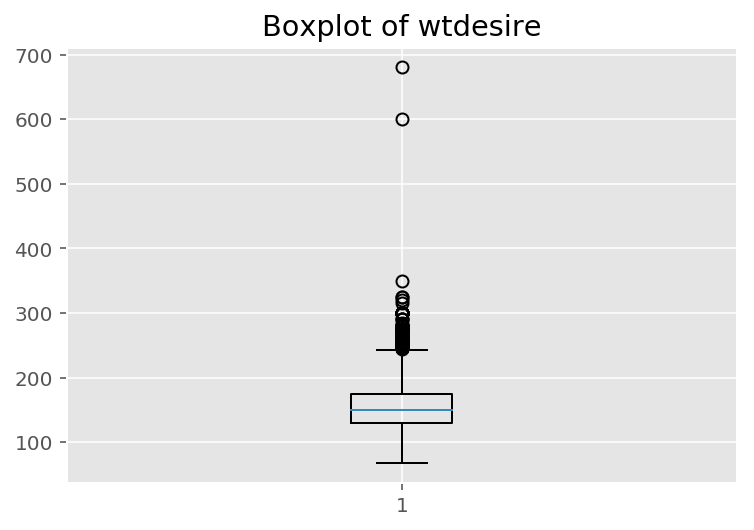

In [0]:
# get five number summary
min = cdc['wtdesire'].min()
q1  = cdc['wtdesire'].quantile(0.25)
median  = cdc['wtdesire'].quantile(0.50)  
q3  = cdc['wtdesire'].quantile(0.75)
max = cdc['wtdesire'].max()
iqr     = q3 - q1

# get fences/whiskers/limits
max_whisker = q3 + 1.5 * iqr
min_whisker = q1 - 1.5 * iqr

# save outliers to a list
outliers = []
for value in cdc['wtdesire']:
  if value > max_whisker or value < min_whisker:
    outliers.append(value)

print('Min:', min)
print('Q1:', q1)
print('Median:', median)
print('Q3:', q3)
print('Max:', max)
print('IQR:', iqr)

print("\nMax upper whisker", max_whisker)
print("Max lower whisker", min_whisker)

print("\nTotal outliers:", len(outliers))
outliers.sort(reverse=True)
print("Highest 10 outlier values:", outliers[:10])

plt.boxplot(x=cdc['wtdesire'])
plt.title("Boxplot of wtdesire")
plt.show();



###Q6. Create new dataset "under25_and_overweight" containing all observations with age < 25 and overweight. How many rows? Print head(5). What % of observations under age 25 think they are overweight?

In [0]:
under25_and_overweight = cdc[(cdc['age'] < 25) & (cdc['weight'] > cdc['wtdesire'])]
print("Rows:", under25_and_overweight.shape[0])
print(under25_and_overweight.head(5))


Rows: 1134
      genhlth  exerany  hlthplan  smoke100  ...  weight  wtdesire  age  gender
36  very good        1         0         1  ...     160       140   18       f
51  very good        1         1         0  ...     135       128   21       f
61  very good        1         1         0  ...     144       120   20       f
68  very good        1         1         0  ...     140       130   18       f
70       fair        1         1         1  ...     140       115   24       f

[5 rows x 9 columns]


In [0]:
# total 
under25 = cdc[cdc['age'] < 25]

# minority / majoirty * 100
print(
     str(round(under25_and_overweight.shape[0] / under25.shape[0] * 100, 2)) +
         "% of respondents under 25 think they are overweight.")


47.99% of respondents under 25 think they are overweight.


### Q7. Create a new variable (column) called wdiff that is the difference between wtdesire and weight. What % of respondents wdiff is zero? What % of respondents think they are underweight and overweight? Create a scatter plot of weight vs wtdesire with a line fit, slope 1, intercept 0.

28.08% of respondents are happy with their current weight.
8.1% of respondents think they are underweight.
63.82% of respondents think they are overweight.


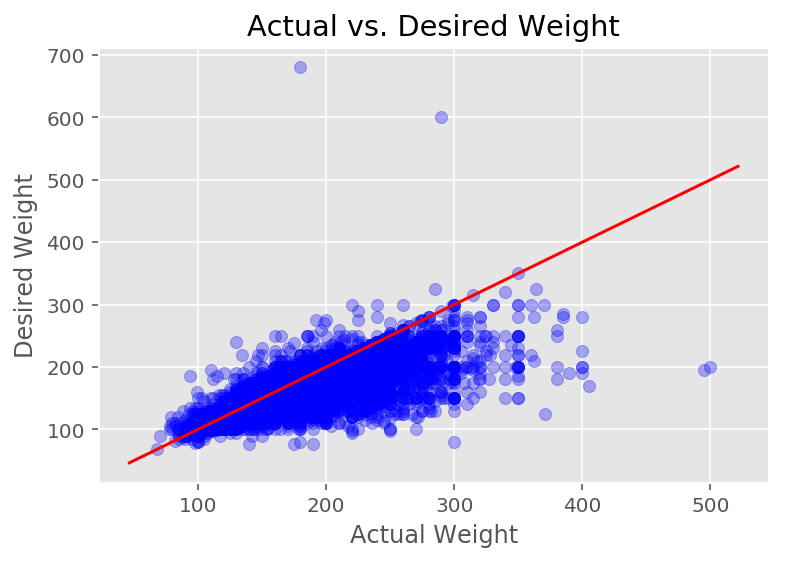

As the weight increases, the desired weight also increases,
 but not as much the weight itself. There are more respondents
 who think they are overweight compared to underweight
 more points under the line compared to over the line).


In [0]:
# create the variable (column)
cdc['wdiff'] = cdc['wtdesire'] - cdc['weight']

# find what % of wdiff is zero
# minority / majority * 100
print(
    str(cdc['wdiff'][cdc['wdiff'] == 0].shape[0] / cdc.shape[0] * 100) +
    "% of respondents are happy with their current weight.")

# find what % of wdiff is > 0 (underweight)
# minority / majority * 100
print(
    str(cdc['wdiff'][cdc['wdiff'] > 0].shape[0] / cdc.shape[0] * 100) +
    "% of respondents think they are underweight.")

# find what % of wdiff is < 0 (overweight)
# minority / majority * 100
print(
    str(cdc['wdiff'][cdc['wdiff'] < 0].shape[0] / cdc.shape[0] * 100) +
    "% of respondents think they are overweight.")

def plot_line(axis, slope, intercept, **kargs):
  xmin, xmax = axis.get_xlim()
  plt.plot([xmin, xmax], [xmin*slope + intercept, xmax*slope + intercept], **kargs)
  
x = cdc['weight']
y = cdc['wtdesire']
plt.scatter(x, y,  c = 'blue', alpha = 0.3)
plot_line(axis=plt.gca(), slope=1, intercept=0, color="red")
plt.xlabel('Actual Weight')
plt.ylabel('Desired Weight')
plt.title('Actual vs. Desired Weight')
plt.show();

print("As the weight increases, the desired weight also increases,\n",
      "but not as much the weight itself. There are more respondents\n",
      "who think they are overweight compared to underweight\n",
      "more points under the line compared to over the line).")
    

###Q8. Create a side-by-side boxplot to see if men view their weight differently to women.

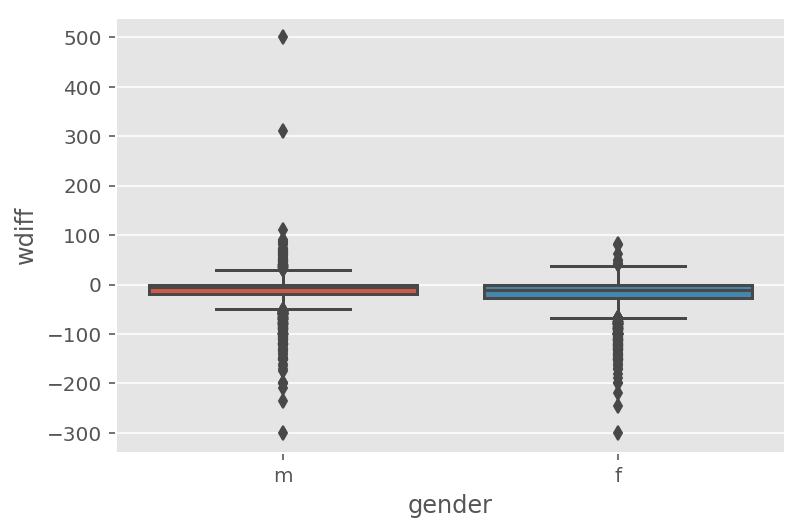

There seems to be no significant difference between actual weight
and desired weight distribution for men and women.


In [0]:
sns.boxplot(x = cdc['gender'], y = cdc['wdiff'])
plt.show(); 
print("There seems to be no significant difference between",
      "actual weight\nand desired weight distribution for men and women.")